# Survey Data Visualizer and Analysis

## Part 1: Import and Load Data

Here we import the necessary modules (numpy, pandas, and matplotlib) and load the data from the survey results.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Drop the unnecessary columns such as timestamp, date of birth, and feedbacks.

In [7]:
data = pd.read_csv('survey_data/survey_data_clean.csv')
data.drop(['timestamp', 'dob', '?questions', '?feedback'], axis=1, inplace=True)
data.head(5)

,major,~coding,~marketing,~networking,~problem solving,~math,~physics,~softskill,~create software,~content creation,~physical networking,!coder or manager,!build planning,!coding often
0,Computer Science,2,4,1,1,1,1,3,2,3,1,Product Manager,Plan for everything before building,Often (daily)
1,Computer Science,4,1,4,5,1,3,3,5,2,4,Code Developer,Build while planning,Often (daily)
2,Computer Science,5,2,2,4,3,2,2,5,2,3,Code Developer,Build while planning,Often (daily)
3,Telecoms and Networking,3,3,4,4,4,4,4,4,4,4,Product Manager,Plan for everything before building,Sometimes (>= once / week)
4,Computer Science,3,2,3,3,2,4,3,3,4,3,Either/Neither,Build while planning,Rarely (< once / month)


## Part 2: Data cleanup and visualization

Here we extract the rulesets by dividing the data into three groups, depending on the major that the survey participant has chosen.

After we have separated the data, we can drop the `major` column from the dataframes.

Next, we rename the multiple choice questions into enumerations, so that we can easily translate the answers by just entering the index of the answer, instead of having to type out the entire answer.

In [8]:
data_cs = data[data['major'] == "Computer Science"].copy()
data_tn = data[data['major'] == "Telecoms and Networking"].copy()
data_ec = data[data['major'] == "E-Commerce"].copy()

data_cs.drop('major', axis=1, inplace=True)
data_tn.drop('major', axis=1, inplace=True)
data_ec.drop('major', axis=1, inplace=True)

def rename_data(data: pd.DataFrame):
    data.replace({
        'Code Developer': 1, 'Product Manager': 2, 'Either/Neither': 3,
        'Plan for everything before building': 1, 'Build while planning': 2,
        'Rarely (< once / month)': 1, 'Occasionally (>= once / month)': 2, 'Sometimes (>= once / week)': 3, 'Often (daily)': 4
    }, inplace=True)
    
rename_data(data_cs)
rename_data(data_tn)
rename_data(data_ec)
data_ec


,~coding,~marketing,~networking,~problem solving,~math,~physics,~softskill,~create software,~content creation,~physical networking,!coder or manager,!build planning,!coding often
14,4,4,3,4,3,4,4,4,4,4,2,1,3
22,2,4,1,5,3,5,5,1,3,1,2,2,1
23,4,4,4,4,4,5,5,3,3,3,2,1,1
25,1,5,1,3,5,1,5,1,5,2,2,2,1
28,4,5,3,5,5,5,5,4,5,3,2,1,2
29,3,5,1,5,3,5,5,3,3,1,2,2,1


Here we create a function `extract_rule` that takes a dataframe and a column name as input, and returns a dictionary with the ruleset as the key, and the normalized counts of each response as the values.

We can now use this function to extract the rulesets for each major.

After that, we package everything together into a function `create_ruleset` that will just take the data as input, and returns a ruleset dictionary of all the columns.

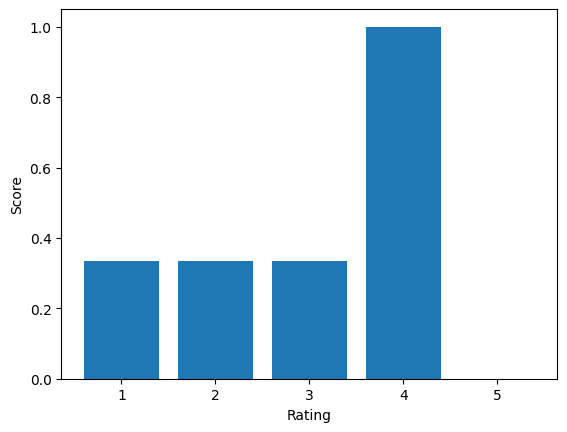

In [9]:
def extract_rule(data: pd.DataFrame, column: str) -> dict:
    return (data.value_counts(column) / data.value_counts(column).max()).to_dict()

dex = dict([(col_name, extract_rule(data_ec, col_name)) for col_name in data_tn.columns.to_list()])

for i in data_tn.columns.to_list():
    for k in range(1, 6):
        if dex[i].get(k) is None:
            dex[i][k] = 0

plt.bar(dex['~coding'].keys(), dex['~coding'].values())
plt.xlabel('Rating')
plt.ylabel('Score')
plt.show()

def create_ruleset(data: pd.DataFrame) -> dict:
    d = dict([(col_name, extract_rule(data, col_name)) for col_name in data.columns.to_list()])
    for i in data.columns.to_list():
        for k in range(1, 6):
            if d[i].get(k) is None:
                d[i][k] = 0
    return d

ruleset = {
    'data_cs': create_ruleset(data_cs),
    'data_tn': create_ruleset(data_tn),
    'data_ec': create_ruleset(data_ec),
    'legend': {
        'Code Developer': 1, 'Product Manager': 2, 'Either/Neither': 3,
        'Plan for everything before building': 1, 'Build while planning': 2,
        'Rarely (< once / month)': 1, 'Occasionally (>= once / month)': 2, 'Sometimes (>= once / week)': 3, 'Often (daily)': 4
    }
}

In [10]:
import json

with open('survey_data/rules.json', 'w') as f:
    json.dump(ruleset, f, indent=4)